In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [119]:
train_df = pd.read_csv(r"C:\Users\GAGANA\Downloads\employee_train.csv")

In [121]:
test_df = pd.read_csv(r"C:\Users\GAGANA\Downloads\employee_test.csv")

In [123]:
train_df.shape

(1048, 28)

In [125]:
train_df.drop(columns=["Timestamp", "comments"], inplace=True)
test_df.drop(columns=["Timestamp", "comments"], inplace=True)

In [127]:
# Handle missing values:
# - 'self_employed' has NaNs, replace with 'No' (assuming most people are employed)
train_df["self_employed"].fillna("No", inplace=True)
test_df["self_employed"].fillna("No", inplace=True)

In [129]:
# - 'work_interfere' has NaNs, replace with 'Don't know' (assuming uncertainty)
train_df["work_interfere"].fillna("Don't know", inplace=True)
test_df["work_interfere"].fillna("Don't know", inplace=True)

In [131]:
# - 'state' has many missing values; since it's highly granular, we can fill with "Unknown"
train_df["state"].fillna("Unknown", inplace=True)
test_df["state"].fillna("Unknown", inplace=True)

In [133]:
# - 'benefits', 'leave', 'wellness_program' have some missing values, replace with "Don't know"
for col in ["benefits", "leave", "wellness_program"]:
    train_df[col].fillna("Don't know", inplace=True)
    test_df[col].fillna("Don't know", inplace=True)

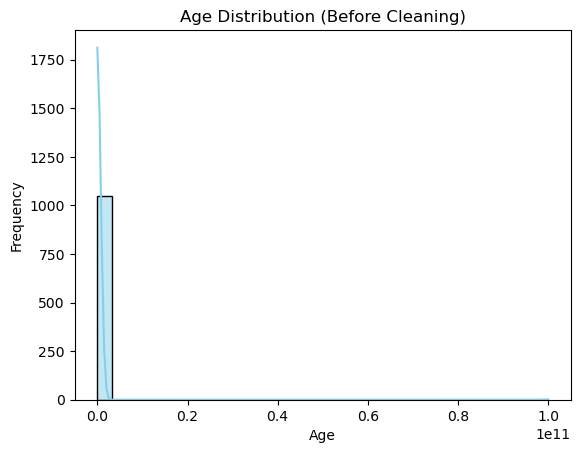

In [135]:
# Age distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train_df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution (Before Cleaning)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('Age Distribution (Before Cleaning)')
plt.show()

In [137]:
# Clean Age: Replace outliers (e.g., unrealistic values like 0 or very high numbers) with median age
train_df.loc[(train_df["Age"] < 18) | (train_df["Age"] > 80), "Age"] = train_df["Age"].median()
test_df.loc[(test_df["Age"] < 18) | (test_df["Age"] > 80), "Age"] = test_df["Age"].median()

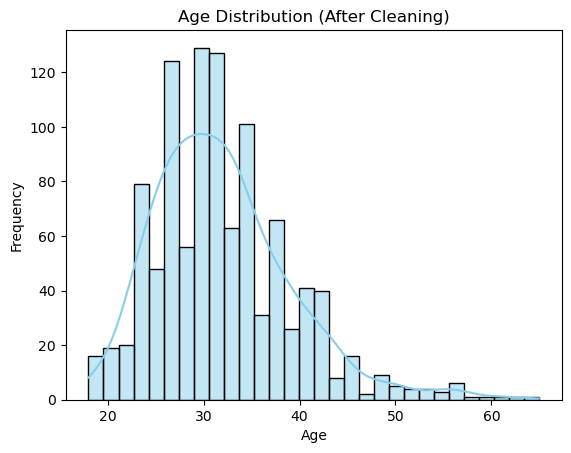

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train_df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution (After Cleaning)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('Age Distribution (After Cleaning)')
plt.show()

In [141]:
# Convert target variable to binary (Yes = 1, No = 0)
train_df["treatment"] = train_df["treatment"].map({"Yes": 1, "No": 0})

In [143]:
cat_cols = train_df.describe(include = 'object').columns.to_list()
print(cat_cols)

['Gender', 'Country', 'state', 'self_employed', 'family_history', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']


In [145]:
for i in cat_cols:
    print(train_df[i].value_counts())
    print(f'No of unique values in {i} = {train_df[i].nunique()}')
    print(train_df.groupby(i)['treatment'].value_counts(normalize = True) * 100)
    print('--'*20)

Gender
Male                        518
male                        162
M                           100
Female                       99
female                       48
F                            33
m                            30
f                            13
Make                          4
Female                        2
Cis Male                      2
Woman                         2
Female (trans)                2
Man                           2
Male                          1
Agender                       1
cis-female/femme              1
Guy (-ish) ^_^                1
male leaning androgynous      1
A little about you            1
Mail                          1
Female (cis)                  1
msle                          1
Neuter                        1
Androgyne                     1
queer                         1
cis male                      1
Trans woman                   1
Nah                           1
Genderqueer                   1
fluid                         1
E

In [147]:
# checking for duplicates

train_df[train_df.duplicated()]

,S.No,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence


In [149]:
train_df['treatment'].value_counts(normalize = True) * 100

treatment
0    51.145038
1    48.854962
Name: proportion, dtype: float64

In [151]:
train1 = train_df.copy()

In [153]:
train_df.columns

Index(['S.No', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [155]:
train_df.drop(['S.No'],axis =1,inplace= True)

In [157]:
train_df['Gender'].replace({'male': 'Male','M':'Male','m':'Male','Make':'Male','Cis Male':'Male','Man':'Male','Male ':'Male','Guy (-ish) ^_^':'Male','Mail':'Male','msle':'Male','cis male':'Male','Male (CIS)':'Male','Mal':'Male','something kinda male?':'Male','maile':'Male','Male-ish':'Male','Malr':'Male',
                           'female':'Female','F':'Female','f':'Female','Female ':'Female','Woman':'Female','cis-female/femme':'Female','Female (cis)':'Female','woman':'Female','Femake':'Female','Cis Female':'Female',
                           'Female (trans)':'Others','Agender':'Others','male leaning androgynous':'Others','A little about you':'Others','Neuter':'Others','Androgyne':'Others','queer':'Others','Trans woman':'Others','Nah':'Others',
                           'Genderqueer':'Others','fluid':'Others','Enby':'Others','All':'Others','non-binary':'Others','queer/she/they':'Others','Trans-female':'Others'},inplace=True)

In [159]:
train_new = train_df[(train_df['Gender'] == 'Male') | (train_df['Gender'] == 'Female')].reset_index(drop=True)

In [161]:
miss_val = train_new.isnull().sum()
miss_val[miss_val > 0]/ train_new.shape[0] * 100

Series([], dtype: float64)

In [163]:
train_new1 = train_new.copy()

In [165]:
for i in cat_cols:
    print(train_new1[i].value_counts())
    print(f'No of unique values in {i} = {train_new1[i].nunique()}')
    print(train_new1.groupby(i)['treatment'].value_counts(normalize = True) * 100)
    print('--'*20)

Gender
Male      829
Female    202
Name: count, dtype: int64
No of unique values in Gender = 2
Gender  treatment
Female  1            67.821782
        0            32.178218
Male    0            56.453559
        1            43.546441
Name: proportion, dtype: float64
----------------------------------------
Country
United States             636
United Kingdom            149
Canada                     63
Germany                    35
Netherlands                18
Australia                  18
Ireland                    13
France                     11
India                       8
New Zealand                 6
Sweden                      6
Italy                       6
Switzerland                 6
Brazil                      5
Poland                      5
South Africa                4
Israel                      4
Belgium                     4
Mexico                      3
Bulgaria                    3
Russia                      3
Austria                     3
Singapore            

In [167]:
train_new1.drop(['state','Gender','mental_health_interview','phys_health_interview',
                'tech_company','obs_consequence'],axis=1,inplace=True)

In [169]:
import pandas as pd

# Define correct order
employee_order = [
    '5-Jan', '25-Jun', '26-100', '100-500', '500-1000', 'More than 1000'
]

# Convert to categorical with ordered=True
train_new1['no_employees'] = pd.Categorical(train_new1['no_employees'], categories=employee_order, ordered=True)

# Now sort the values correctly
train_sorted = train_new1.groupby('no_employees').size().reset_index(name='count').sort_values('no_employees')

print(train_sorted)

     no_employees  count
0           5-Jan    130
1          25-Jun    244
2          26-100    233
3         100-500    148
4        500-1000     55
5  More than 1000    221


In [171]:
train_new1['work_interfere_category'] = train_new1['work_interfere'].map({
    "Don't know": "Low",
    "Never": "Low",
    "Rarely": "High",
    "Sometimes": "High",
    "Often": "High"
})

In [173]:
train_new1['no_employees_category'] = train_new1['no_employees'].map({
    "25-Jun": "Low",
    "500-1000": "Low",
    "100-500": "High",
    "5-Jan": "High",
    "More than 1000": "High",
    "26-100": "High"  # Since it's close to 50%
})

In [175]:
train_new1.care_options.replace({'Not sure': 'No'},inplace=True)

In [177]:
train_new1.leave.replace({'Somewhat easy': 'Very easy','Somewhat difficult':'Very difficult'},inplace=True)

In [179]:
train_new.mental_health_interview.replace({'Maybe': 'Yes'},inplace=True)

In [181]:
train_new1.drop(columns=['work_interfere', 'no_employees'], inplace=True)

In [183]:
train_new1.drop(columns=['mental_vs_physical','coworkers'], inplace=True)

In [185]:
train_new1.rename(columns={'work_interfere_category': 'work_interfere',
                           'no_employees_category': 'no_employees'}, inplace=True)

In [187]:
final_column_order = ['Age', 'Country', 'self_employed', 'family_history', 'treatment', 
                      'work_interfere', 'no_employees', 'remote_work', 'benefits', 'care_options', 
                      'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 
                      'phys_health_consequence', 'supervisor']

# Reorder the dataset
train_new1 = train_new1[final_column_order]

# Display the updated dataset
train_new1.head()

,Age,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,supervisor
0,37,United States,No,No,1,High,Low,No,Yes,No,No,Yes,Yes,Very easy,No,No,Yes
1,44,United States,No,No,0,High,High,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No
2,32,Canada,No,No,0,High,Low,No,No,No,No,No,Don't know,Very difficult,No,No,Yes
3,31,United Kingdom,No,Yes,1,High,High,No,No,Yes,No,No,No,Very difficult,Yes,Yes,No
4,31,United States,No,No,0,Low,High,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Yes


In [191]:
print(train_new1.groupby('no_employees')['treatment'].value_counts(normalize=True) * 100)

no_employees  treatment
High          1            50.819672
              0            49.180328
Low           0            57.859532
              1            42.140468
Name: proportion, dtype: float64


In [193]:
train_new1.drop(columns = 'self_employed',inplace=True)

In [195]:
train_new1.drop(columns = 'remote_work',inplace=True)

In [197]:
train_new1.shape

(1031, 15)

In [199]:
final_train = train_new1

In [201]:
final_train = final_train.drop(columns=['Country'])

In [203]:
final_train.shape

(1031, 14)

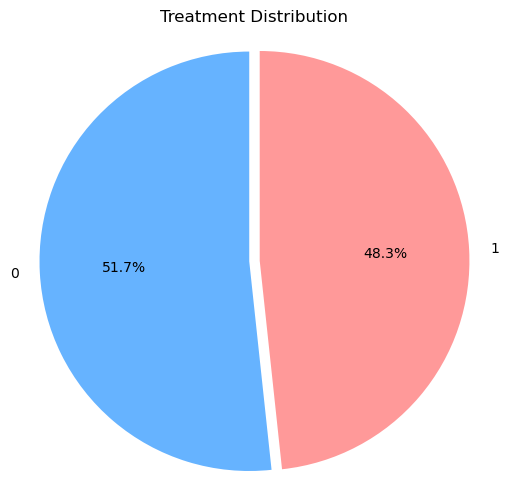

In [213]:
import matplotlib.pyplot as plt

# Assuming your target column is named 'treatment'
treatment_counts = final_train['treatment'].value_counts()
labels = treatment_counts.index
sizes = treatment_counts.values
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.05, 0))
plt.title('Treatment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
plt.savefig('Treatment Distribution')
plt.show()

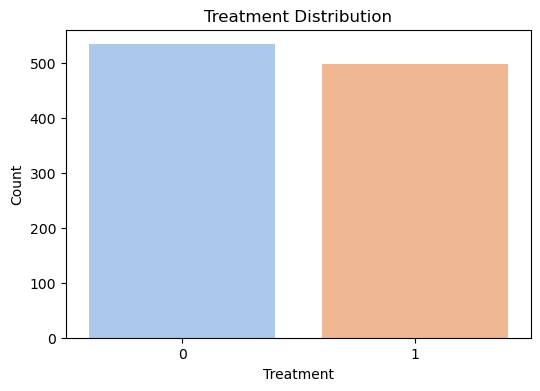

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=final_train, x='treatment', palette='pastel')
plt.title('Treatment Distribution')
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.show()

In [219]:
print(train_new1.groupby('family_history')['treatment'].value_counts(normalize=True) * 100)

family_history  treatment
No              0            66.823899
                1            33.176101
Yes             1            72.658228
                0            27.341772
Name: proportion, dtype: float64


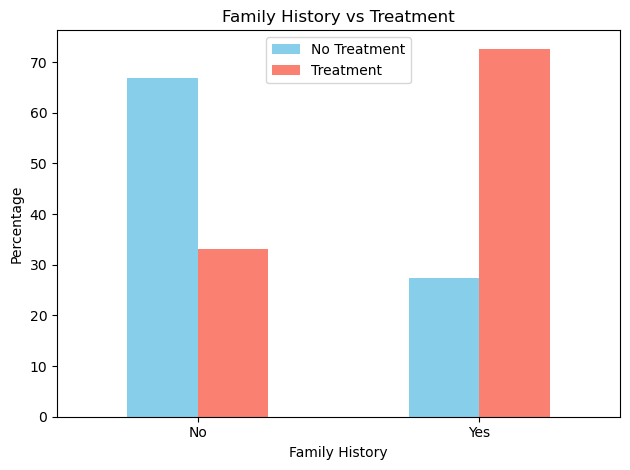

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is called df
grouped = final_train.groupby(['family_history', 'treatment']).size().unstack()
grouped_norm = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot
grouped_norm.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'])
plt.title('Family History vs Treatment')
plt.xlabel('Family History')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(labels=['No Treatment', 'Treatment'])
plt.tight_layout()
plt.savefig('Family History vs Treatment')
plt.show()

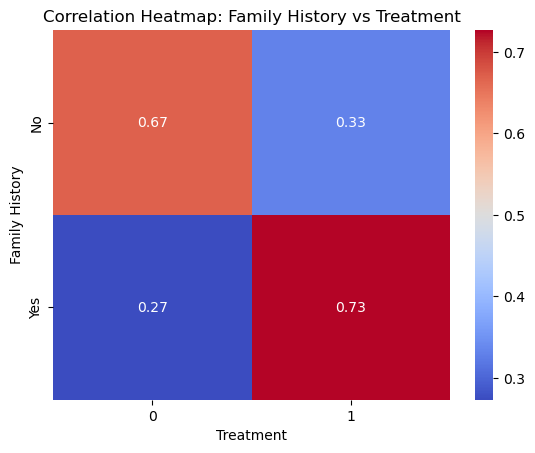

In [237]:
# Contingency table with normalized values
contingency = pd.crosstab(final_train['family_history'], final_train['treatment'], normalize='index')

# Heatmap
sns.heatmap(contingency, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Family History vs Treatment')
plt.xlabel('Treatment')
plt.ylabel('Family History')
plt.savefig('Heatmap: FamilyHistory_vs_Treatment.png')
plt.show()

In [109]:
pd.get_dummies(final_train)

,Age,treatment,family_history_No,family_history_Yes,work_interfere_High,work_interfere_Low,no_employees_High,no_employees_Low,benefits_Don't know,benefits_No,...,leave_Very easy,mental_health_consequence_Maybe,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_Maybe,phys_health_consequence_No,phys_health_consequence_Yes,supervisor_No,supervisor_Some of them,supervisor_Yes
0,37,1,True,False,True,False,False,True,False,False,...,True,False,True,False,False,True,False,False,False,True
1,44,0,True,False,True,False,True,False,True,False,...,False,True,False,False,False,True,False,True,False,False
2,32,0,True,False,True,False,False,True,False,True,...,False,False,True,False,False,True,False,False,False,True
3,31,1,False,True,True,False,True,False,False,True,...,False,False,False,True,False,False,True,True,False,False
4,31,0,True,False,False,True,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,26,1,True,False,True,False,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
1027,29,1,True,False,True,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
1028,26,1,False,True,True,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
1029,33,1,False,True,True,False,False,True,False,True,...,True,False,True,False,False,True,False,False,False,True


In [111]:
pd.get_dummies(final_train)

,Age,treatment,family_history_No,family_history_Yes,work_interfere_High,work_interfere_Low,no_employees_High,no_employees_Low,benefits_Don't know,benefits_No,...,leave_Very easy,mental_health_consequence_Maybe,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_Maybe,phys_health_consequence_No,phys_health_consequence_Yes,supervisor_No,supervisor_Some of them,supervisor_Yes
0,37,1,True,False,True,False,False,True,False,False,...,True,False,True,False,False,True,False,False,False,True
1,44,0,True,False,True,False,True,False,True,False,...,False,True,False,False,False,True,False,True,False,False
2,32,0,True,False,True,False,False,True,False,True,...,False,False,True,False,False,True,False,False,False,True
3,31,1,False,True,True,False,True,False,False,True,...,False,False,False,True,False,False,True,True,False,False
4,31,0,True,False,False,True,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,26,1,True,False,True,False,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
1027,29,1,True,False,True,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
1028,26,1,False,True,True,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
1029,33,1,False,True,True,False,False,True,False,True,...,True,False,True,False,False,True,False,False,False,True


In [113]:
pd.get_dummies(final_train).astype('int')

,Age,treatment,family_history_No,family_history_Yes,work_interfere_High,work_interfere_Low,no_employees_High,no_employees_Low,benefits_Don't know,benefits_No,...,leave_Very easy,mental_health_consequence_Maybe,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_Maybe,phys_health_consequence_No,phys_health_consequence_Yes,supervisor_No,supervisor_Some of them,supervisor_Yes
0,37,1,1,0,1,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
1,44,0,1,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,32,0,1,0,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
3,31,1,0,1,1,0,1,0,0,1,...,0,0,0,1,0,0,1,1,0,0
4,31,0,1,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,26,1,1,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1027,29,1,1,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1028,26,1,0,1,1,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1029,33,1,0,1,1,0,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1


In [115]:
final_train = pd.get_dummies(final_train,drop_first=True).astype('int')

In [117]:
final_train

,Age,treatment,family_history_Yes,work_interfere_Low,no_employees_Low,benefits_No,benefits_Yes,care_options_Yes,wellness_program_No,wellness_program_Yes,...,anonymity_No,anonymity_Yes,leave_Very difficult,leave_Very easy,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_No,phys_health_consequence_Yes,supervisor_Some of them,supervisor_Yes
0,37,1,0,0,1,0,1,0,1,0,...,0,1,0,1,1,0,1,0,0,1
1,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,32,0,0,0,1,1,0,0,1,0,...,0,0,1,0,1,0,1,0,0,1
3,31,1,1,0,0,1,0,1,1,0,...,1,0,1,0,0,1,0,1,0,0
4,31,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,26,1,0,0,1,0,1,1,1,0,...,0,1,0,0,0,0,1,0,0,0
1027,29,1,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1028,26,1,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1029,33,1,1,0,1,1,0,0,1,0,...,0,0,0,1,1,0,1,0,0,1
